# Graph showing Goals Against and Expected Goals Against

## Imports

In [17]:
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import datetime
from highlight_text import HighlightText, ax_text, fig_text

## Retrieve data

In [5]:
data = pd.read_csv("../../data/defense/GoalsAgainst_xGA.csv")

In [6]:
data.head(5)

,Date,GA,xGA,num_match
0,2017-08-12,3,2.0,1
1,2017-08-19,0,0.5,2
2,2017-08-27,0,0.7,3
3,2017-09-09,5,2.8,4
4,2017-09-16,1,0.4,5


In [7]:
goals_against = data['GA'] 
xGA = data['xGA']
date_match = data['Date']
num_match = data ['num_match']

## Create the plot

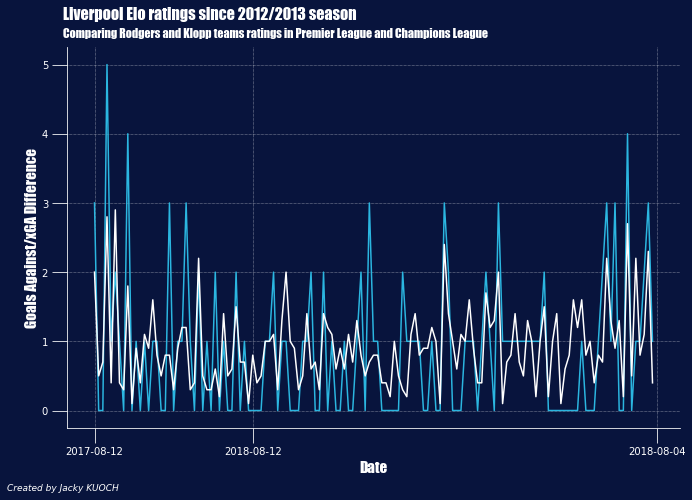

<Figure size 432x288 with 0 Axes>

In [5]:
fig,ax = plt.subplots(figsize = (11,7))

#Add grid to the plot
ax.grid(ls="dotted", lw="0.5", color="w", zorder=1)

hfont = {'fontname':'Impact'}

#Change the background color
fig.set_facecolor("#08143D")
ax.patch.set_facecolor("#08143D")

#Change the ticks color
ax.tick_params(colors="w", length=15)

#Change the axes color
ax.spines['bottom'].set_color("w")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("w")

# Plot the GA and the date 
plt.plot(date_match, goals_against, zorder=2, color="#2bb6e0")

# Plot the xGA and the date
plt.plot(date_match, xGA, zorder=2, color="w")

# Set the ticks
plt.xticks(['2017-08-12', '2018-08-12', '2018-08-04'])
#plt.yticks([1700, 1800, 1900, 2000, 2100])
#ax.set_ylim(1700)
#plt.xlim(xmin='2012-08-18')

# Axes Label
plt.xlabel("Date", color="w", fontsize=15 , **hfont)
plt.ylabel("Goals Against/xGA Difference", color="w", fontsize=15 , **hfont)

# Title and credits
fig.text(0.12,0.9, "Liverpool Elo ratings since 2012/2013 season\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.12,0.9, "Comparing Rodgers and Klopp teams ratings in Premier League and Champions League", fontsize = 12, fontweight="regular", color = "w", **hfont)
fig.text(0.05, 0, "Created by Jacky KUOCH",fontstyle="italic",fontsize=9, color="w")

# Split the graph in two
#ax.axvline(x="2015-10-17", color="w")
#rodgerspart = ax.text(40, 2050, "Rodgers", fontsize=18, ha="center", color="w",alpha=0.2 , **hfont)
#klopppart = ax.text(160, 2050, "Klopp", fontsize=18, ha="center", color="w",alpha=0.2 , **hfont)


# Add points on key dates


## Klopp first game - 17/10/2015
#ax.scatter("2015-10-17", data.loc[data['date_match'] == "2015-10-17", "Elo_Liverpool"], s=120, color="#2bb6e0", edgecolors="#08143D", lw=1, zorder=3 )
#klopp_firstgame = ax.text(105, 1710, "Klopp first\ngame", fontsize=13, ha="center", color="#2bb6e0", **hfont)
#klopp_firstgame.set_path_effects([path_effects.withStroke(linewidth=3, foreground="w")])


plt.show()
plt.tight_layout()


In [33]:
data['10games_rolling_GA'] = data.GA.rolling(10).mean()
data['10games_rolling_xGA'] = data.xGA.rolling(10).mean()

In [34]:
GA_rolling = data['10games_rolling_GA']
xGA_rolling = data['10games_rolling_xGA']

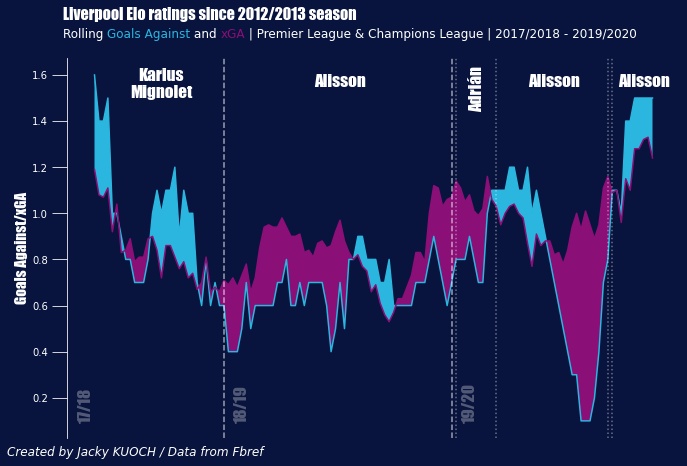

<Figure size 432x288 with 0 Axes>

In [22]:
fig,ax = plt.subplots(figsize = (11,7))

#Define a font
hfont = {'fontname':'Impact'}

#Change the background color
fig.set_facecolor("#08143D")
ax.patch.set_facecolor("#08143D")

#Change the ticks color
ax.tick_params(colors="w", length=15, bottom=False, labelbottom = False)

#Change the axes color and hide some axes
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("w")

# Plot the GA and the date 
plt.plot(num_match, GA_rolling , zorder=2, color="#2bb6e0", linewidth=1.5)

# Plot the xGA and the date
plt.plot(num_match, xGA_rolling, zorder=2, color="#8A0F77", linewidth=1.5)

#Fill between axes
ax.fill_between(num_match,GA_rolling, xGA_rolling, where=GA_rolling >= xGA_rolling, facecolor="#2bb6e0", interpolate=True)
ax.fill_between(num_match,GA_rolling, xGA_rolling, where=xGA_rolling >= GA_rolling, facecolor="#8A0F77", interpolate=True)

# Axes Label
plt.ylabel("Goals Against/xGA", color="w", fontsize=15 , **hfont)

# Title and credits
fig.text(0.12,0.92, "Liverpool Elo ratings since 2012/2013 season\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)


fig_text(x=0.12, y=0.94, s="Rolling <Goals Against> and <xGA> | Premier League & Champions League | 2017/2018 - 2019/2020", highlight_textprops=[{"color":"#2bb6e0"}, {'color':"#8A0F77"}], color="w", fontweight="light", fontsize=12)


fig.text(0.05, 0.09, "Created by Jacky KUOCH / Data from Fbref",fontstyle="italic",fontsize=12, color="w")

# Split the graph in seasons
# 17/18
first_season = ax.text(8, 0.1, "17/18", fontsize=17, ha="center", color="w",alpha=0.3, rotation =90, **hfont)

# 18/19
second_season = ax.text(43, 0.1, "18/19", fontsize=17, ha="center", color="w",alpha=0.3, rotation =90, **hfont)
ax.axvline(x=39, color="w", linestyle = "dashed", alpha=0.6 ,zorder=3)

#19/20
third_season = ax.text(94, 0.1, "19/20", fontsize=17, ha="center", color="w",alpha=0.3, rotation =90, **hfont)
ax.axvline(x=90, color="w", linestyle = "dashed", alpha=0.6 ,zorder=3)

# Goalkeepers era
karius_mignolet = ax.text(25, 1.50, "Karius\nMignolet", fontsize=17, ha="center", color="w",alpha=1 , **hfont)
alisson_1 = ax.text(65, 1.55, "Alisson", fontsize=17, ha="center", color="w",alpha=1 , **hfont)

adrian = ax.text(95.5, 1.45, "Adrián", fontsize=17, ha="center", color="w",alpha=1 , rotation=90, **hfont)
ax.axvline(x=91, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)
ax.axvline(x=100, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)

alisson_2 = ax.text(113, 1.55, "Alisson", fontsize=17, ha="center", color="w",alpha=1 , **hfont)

ax.axvline(x=125, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)
ax.axvline(x=126, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)

alisson_3 = ax.text(133, 1.55, "Alisson", fontsize=17, ha="center", color="w",alpha=1 , **hfont)

# Add points on key dates
## Klopp first game - 17/10/2015
#ax.scatter("2015-10-17", data.loc[data['date_match'] == "2015-10-17", "Elo_Liverpool"], s=120, color="#2bb6e0", edgecolors="#08143D", lw=1, zorder=3 )
#klopp_firstgame = ax.text(105, 1710, "Klopp first\ngame", fontsize=13, ha="center", color="#2bb6e0", **hfont)
#klopp_firstgame.set_path_effects([path_effects.withStroke(linewidth=3, foreground="w")])

plt.show()
plt.tight_layout()